In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr

In [2]:
T = 1
K = 110
S = 100
M=10
sigma = 0.2
r = 0.06
realizations = 8

In [3]:
def GBM_Euler(T, S, sigma, r, M, Z_all = None):
    S_all = []
    S_all.append(S)
    dt = T/M
    
    Zm = np.random.normal(size=M)
    for i in range(M-1):
        S_all.append(S_all[i] + r* S_all[i] * dt + sigma * S_all[i] * np.sqrt(dt) * Zm[i]) 
    return S_all

In [4]:
s_all = [GBM_Euler(T, S, sigma, r, M) for x in range(realizations)]

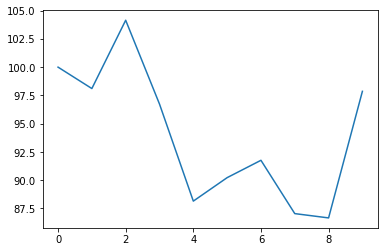

In [5]:
plt.plot(s_all[4])

In [6]:
## Cash flow matrices
path_matrix = np.zeros((realizations, M))
for realization in range(realizations):
    path_matrix[realization,:] = s_all[realization]

In [7]:
## value at T
np.maximum(0,path_matrix[:,M-1] - K)

array([ 8.7493498 , 13.21117314,  0.        ,  0.        ,  0.        ,
        0.        , 11.93696431,  5.66578225])

In [8]:
## valuation at T-1 with regression model
X = np.where(path_matrix[:,M-2]>K, path_matrix[:,M-2], 0)
Y = np.where(path_matrix[:,M-2]>K, np.maximum(path_matrix[:,M-1]-K, 0), 0) *np.exp(-r)

X_nonzero = X[X>0]
Y_nonzero = Y[X>0]

In [9]:
poly = odr.polynomial(2)
data = odr.Data(X_nonzero ,Y_nonzero)
model = odr.ODR(data, poly)
output = model.run()
final = np.poly1d(output.beta[::-1])
final_y = final(X_nonzero)

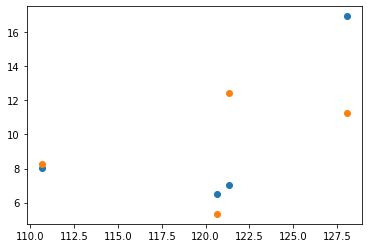

In [10]:
plt.scatter(X_nonzero , final_y, label="model", marker='o')
plt.scatter(X_nonzero , Y_nonzero , label="data", marker='o')

In [11]:
X

array([110.67354633, 121.32790342,   0.        ,   0.        ,
         0.        ,   0.        , 128.04533992, 120.64066095])

In [12]:
Y

array([ 8.23982733, 12.44181431,  0.        ,  0.        ,  0.        ,
        0.        , 11.24180962,  5.33583277])

In [13]:
## Compare excerise with continuation
ex_cont = np.zeros((len(X_nonzero), 2))
ex_cont[:,0] = X_nonzero - K
ex_cont[:,1] = final_y

In [14]:
ex_cont

array([[ 0.67354633,  8.04901361],
       [11.32790342,  7.04691499],
       [18.04533992, 16.9431806 ],
       [10.64066095,  6.49356552]])

In [15]:
## build cash flow matrix T-1

In [16]:
cash_flow_2 = np.zeros((realizations, 2))

In [17]:
j=0
for i in range(len(X)):
    if X[i] > 0:
        if ex_cont[j,0] > ex_cont[j,1]:
            cash_flow_2[i, 0] = ex_cont[j,0] 
        else:
            cash_flow_2[i,1] = ex_cont[j,1]
            
        j+=1

In [18]:
cash_flow_2

array([[ 0.        ,  8.04901361],
       [11.32790342,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [18.04533992,  0.        ],
       [10.64066095,  0.        ]])

In [19]:
path_matrix

array([[100.        , 107.83366884,  97.39047041,  98.2476303 ,
         80.75940358,  83.66123896,  90.87905131,  96.974391  ,
        110.67354633, 118.7493498 ],
       [100.        , 113.19967133, 110.81314327, 105.18250773,
        120.56767172, 132.42068379, 122.8153136 , 122.81360268,
        121.32790342, 123.21117314],
       [100.        ,  97.98975081,  95.52950052, 100.6953805 ,
         94.09212191,  92.76282123,  91.04431923,  81.09346251,
         88.34881936,  91.05524683],
       [100.        , 100.97362113,  88.79931854,  94.76323804,
         94.60324023,  98.6271666 ,  94.7628143 ,  95.61877756,
        100.14640329,  97.16832953],
       [100.        ,  98.106327  , 104.14823235,  96.73412459,
         88.14945747,  90.2247255 ,  91.75934215,  87.04407498,
         86.66286078,  97.86092501],
       [100.        , 105.64936865, 104.01953156, 106.55138431,
        111.91275851, 106.41585149,  97.28380905,  98.53759228,
         98.2666538 ,  95.13523401],
       [10